In [2]:
import equivalence_class
from collections import defaultdict
from termcolor import colored
# import transpositions

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def print_matrices(elt, color="white", elt_matrix = None, w0_matrix=None,sum_matrix = None,silent=True):
    """Prints out an element and some matrices"""
    w0_elt = elt.w0()
    s = "{} {}:{} {}".format(elt.word,elt.oneline,w0_elt.word,w0_elt.oneline)
    elt_sigma = elt.matrix_sigma()
    w0_sigma = w0_elt.matrix_sigma()
    elt_delta = elt_sigma.dot()
    w0_delta = w0_sigma.dot()
    elt_matrix = elt_matrix.concat_right(elt_delta)
    w0_matrix = w0_matrix.concat_right(w0_delta)
    sum_matrix = sum_matrix.concat_right(elt_delta+elt_delta.flip())
    if not silent:
        print(colored(s,color))
        print(colored("------",color))
        print(elt_sigma)
        print(w0_sigma)
        print(colored("------",color))
        print(elt_delta)
        print(w0_delta)
    return elt_matrix,w0_matrix,sum_matrix
    
    # plt.show()
    # print(colored("-------------------------",color))

In [121]:
N = 3
SILENT = True
A = equivalence_class.equiv_tree(N)
A.make_equiv_class()
equiv = A.nodes("equiv")
print("\nEquivalence class")
print("Size:",len(equiv))
# for elt in equiv:
#     print_matrices(elt,"white")
# exit(0)

if not SILENT:
    for elt in equiv:
        print(elt.word,end=", ")

A.make_ascending_equiv_class()
ascend = A.nodes("ascend")
print("\n\nEquivalence class (ascending only)")
print("Size:",len(ascend))
if not SILENT:
    for elt in ascend:
        print(elt.word,end=", ")

A.make_symmetric_group()
sym = A.nodes("sym")
print("\n\nSymmetric group")
print("Size:",len(sym))
D = defaultdict(list)
for elt in sym:
    D[elt.word_len].append(elt)



big_elt_matrix = equivalence_class.matrix()
big_w0_matrix = equivalence_class.matrix()
big_sum_matrix = equivalence_class.matrix()
# for i in range(max(D.keys())//2+1):
for i in range(max(D.keys())+1):
# for i in range(1):
    if not SILENT:
        print(" Rank:",i)
        print("--------------------------------------------")
    elt_matrix = equivalence_class.matrix()
    w0_matrix = equivalence_class.matrix()
    sum_matrix = equivalence_class.matrix()
    for elt in D[i]:
        if elt in ascend:
            elt_matrix,w0_matrix,sum_matrix = print_matrices(elt,"green",elt_matrix,w0_matrix,sum_matrix,SILENT)
        elif elt in equiv:
            elt_matrix,w0_matrix,sum_matrix = print_matrices(elt,"blue",elt_matrix,w0_matrix,sum_matrix,SILENT)
        else:
            elt_matrix,w0_matrix,sum_matrix = print_matrices(elt,"white",elt_matrix,w0_matrix,sum_matrix,SILENT)
    big_elt_matrix = big_elt_matrix.concat_down(elt_matrix)
    big_w0_matrix = big_w0_matrix.concat_down(w0_matrix)
    big_sum_matrix = big_sum_matrix.concat_down(sum_matrix)
    if not SILENT:
        print("\n===========================================")


Equivalence class
Size: 7


Equivalence class (ascending only)
Size: 7


Symmetric group
Size: 24


5.15 6.05


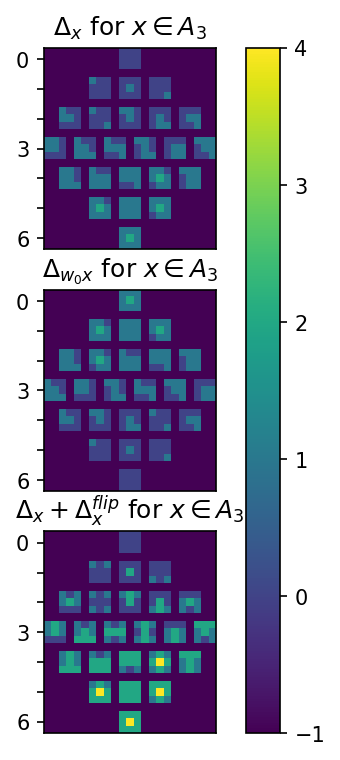

In [123]:
if big_elt_matrix.empty:
    print("No big matrix made")
else:
    width = 4.0+(len(big_elt_matrix.data[0])/20)
    length = 2.0+3*len(big_elt_matrix.data)/20
    print(width,length)
    fig,ax = plt.subplots(3,figsize=(width,length),dpi=150)
    vmin = -1
    vmax = N + N%2
    yticks = [(N+1)*y+N//2 for y in range(max(D.keys())+1)]
    yticklabels = []
    for y in range(max(D.keys())+1):
        if y%3==0:
            yticklabels.append(str(y))
        else:
            yticklabels.append("")

    im0 = ax[0].imshow(np.array(big_elt_matrix.data), vmin=vmin,vmax=vmax)
    ax[0].title.set_text("$\Delta_x$ for $x \in A_{}$".format(N))
    ax[0].set_yticks(yticks)
    ax[0].set_yticklabels(yticklabels)
    ax[0].set_xticks([])
    im1 = ax[1].imshow(np.array(big_w0_matrix.data), vmin=vmin,vmax=vmax)
    ax[1].title.set_text("$\Delta_{w_0 x}$ for "+"$x \in A_{}$".format(N))
    ax[1].set_yticks(yticks)
    ax[1].set_yticklabels(yticklabels)
    ax[1].set_xticks([])
    im2 = ax[2].imshow(np.array(big_sum_matrix.data), vmin=vmin,vmax=vmax)
    ax[2].title.set_text("$\Delta_x + \Delta_x^{flip}$ "+"for $x \in A_{}$".format(N))
    ax[2].set_yticks(yticks)
    ax[2].set_yticklabels(yticklabels)
    ax[2].set_xticks([])
    fig.colorbar(im2,ax=ax.ravel().tolist())
    fig.savefig("A{}.png".format(N))
    fig.show()